In [27]:
import numpy as np
import pandas as pd

df = pd.read_csv('new_data1.csv')
stations = ['VSKP','YLM','ANV','SLO','NDD','BZA','WL','KZJ','SC','HYB']
for i in stations:
    avg = df[i].mean()
    df[i]=df[i].apply(lambda x: 0 if x < avg else 1)
print(df)

    date(dd/mm/yy)  VSKP  Temperature_1  Wind_Speed_1  Distance_travelled_1  \
0       06-08-2023     1           30.2           2.8                     0   
1       07-08-2023     1           31.2           2.1                     0   
2       08-08-2023     0           30.5           2.4                     0   
3       09-08-2023     0           30.5           2.3                     0   
4       10-08-2023     0           30.2           2.3                     0   
..             ...   ...            ...           ...                   ...   
360     31-07-2024     0           29.8           2.0                     0   
361     01-08-2024     1           30.0           2.8                     0   
362     02-08-2024     0           28.6           2.6                     0   
363     03-08-2024     0           28.3           2.1                     0   
364     04-08-2024     1           29.6           2.5                     0   

     YLM  Temperature_2  Wind_Speed_2  Distance_tra

In [19]:
from sklearn.model_selection import train_test_split

X = df[["VSKP", "Temperature_1", "Wind_Speed_1", "Distance_travelled_1", "YLM", "Temperature_2", "Wind_Speed_2", "Distance_travelled_2", "ANV", "Temperature_3", "Wind_Speed_3", "Distance_travelled_3", "SLO", "Temperature_4", "Wind_Speed_4", "Distance_travelled_4", "NDD", "Temperature_5", "Wind_Speed_5", "Distance_travelled_5", "BZA", "Temperature_6", "Wind_Speed_6", "Distance_travelled_6", "WL", "Temperature_7", "Wind_Speed_7", "Distance_travelled_7", "KZJ", "Temperature_8", "Wind_Speed_8", "Distance_travelled_8", "SC", "Temperature_9", "Wind_Speed_9", "Distance_travelled_9", "Temperature_10", "Wind_Speed_10", "Distance_travelled_10"]]
y = df['HYB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
     VSKP  Temperature_1  Wind_Speed_1  Distance_travelled_1  YLM  \
268     0           31.4           3.0                     0    0   
231     0           28.7           2.5                     0    0   
157     1           24.6           1.2                     0    1   
19      1           29.1           2.3                     0    1   
147     0           25.1           1.3                     0    0   
..    ...            ...           ...                   ...  ...   
71      0           30.0           1.1                     0    0   
106     1           26.9           4.5                     0    1   
270     0           31.7           3.8                     0    1   
348     0           25.5           2.6                     0    1   
102     1           29.0           3.1                     0    0   

     Temperature_2  Wind_Speed_2  Distance_travelled_2  ANV  Temperature_3  \
268           31.8           4.4                    58    0           33.1   
231   

In [20]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

print("kNN Classifier trained successfully.")

kNN Classifier trained successfully.


In [8]:
accuracy = neigh.score(X_test, y_test)

print(f"Accuracy of the kNN classifier on the test set: {accuracy:.2f}")


Accuracy of the kNN classifier on the test set: 0.69


In [9]:
predictions = neigh.predict(X_test)

print("Predicted class labels for the test set:")
print(predictions)


Predicted class labels for the test set:
[1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

train_predictions = neigh.predict(X_train)
predictions = neigh.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix for the test set:")
print(conf_matrix)

print("\nClassification Report for the test set:")
print(classification_report(y_test, predictions))

conf_matrix_train = confusion_matrix(y_train, train_predictions)
print("\nConfusion Matrix for the training set:")
print(conf_matrix_train)

print("\nClassification Report for the training set:")
print(classification_report(y_train, train_predictions))

train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

test_accuracy = accuracy_score(y_test, predictions)
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions)

print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

if train_accuracy > test_accuracy:
    print("\nThe model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("\nThe model might be underfitting.")
else:
    print("\nThe model appears to be fitting the data well (regular fit).")


Confusion Matrix for the test set:
[[66 10]
 [24 10]]

Classification Report for the test set:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80        76
           1       0.50      0.29      0.37        34

    accuracy                           0.69       110
   macro avg       0.62      0.58      0.58       110
weighted avg       0.66      0.69      0.66       110


Confusion Matrix for the training set:
[[146  19]
 [ 31  59]]

Classification Report for the training set:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.76      0.66      0.70        90

    accuracy                           0.80       255
   macro avg       0.79      0.77      0.78       255
weighted avg       0.80      0.80      0.80       255


Training Set Metrics:
Accuracy: 0.8039
Precision: 0.7564
Recall: 0.6556
F1-Score: 0.7024

Test Set Metrics:
Accuracy: 0.6909
Precision: 0.5000

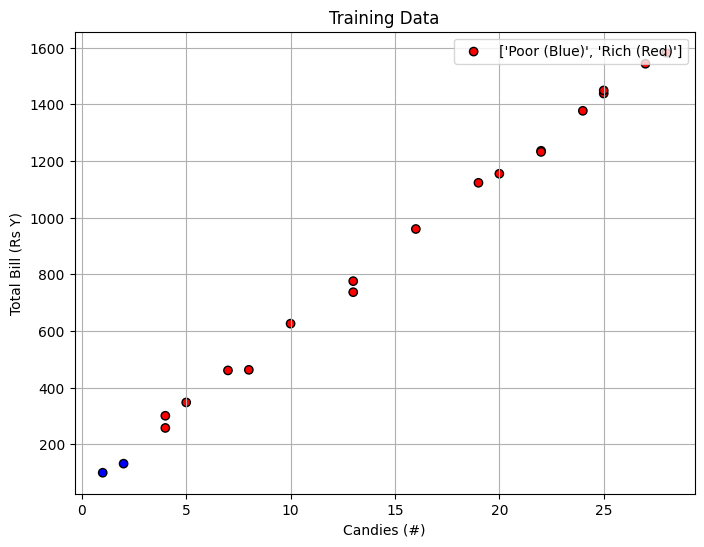

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(0)

# Given unit prices
price_candies = 55
price_mangoes = 1
price_milk_packets = 18

# Function to calculate total bill and classify as 'rich' or 'poor'
def calculate_total_bill(X1, X2, X3):
    return X1 * price_candies + X2 * price_mangoes + X3 * price_milk_packets

# Task A3: Generate Training Data
n_points = 20
X1_train = np.random.randint(1, 30, size=n_points)  # Candies (#)
X2_train = np.random.randint(1, 10, size=n_points)  # Mangoes (Kg)
X3_train = np.random.randint(1, 5, size=n_points)   # Milk Packets (#)
Y_train = calculate_total_bill(X1_train, X2_train, X3_train)
y_train = np.where(Y_train > 200, 1, 0)  # 1 for 'rich' (Y > 200), 0 for 'poor' (Y <= 200)

# Plot training data
colors = np.where(y_train == 0, 'blue', 'red')
plt.figure(figsize=(8, 6))
plt.scatter(X1_train, Y_train, c=colors, marker='o', edgecolors='k', label=['Poor (Blue)', 'Rich (Red)'])
plt.title('Training Data')
plt.xlabel('Candies (#)')
plt.ylabel('Total Bill (Rs Y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


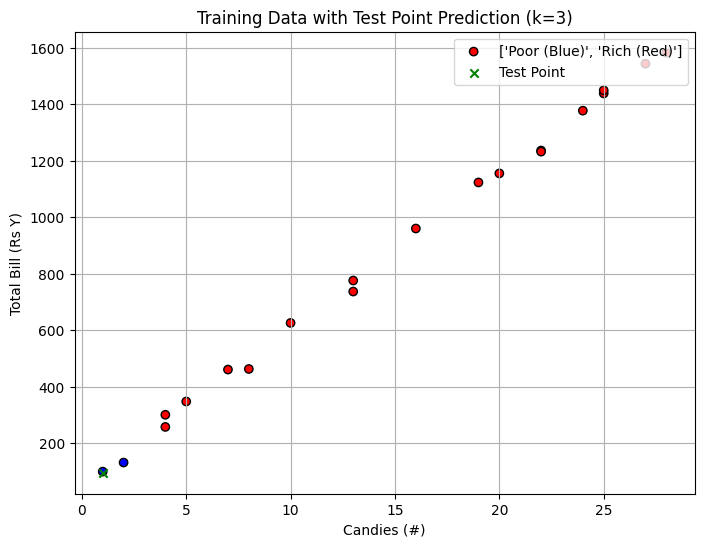

Test point is classified as Poor (Blue)


In [14]:
from sklearn.neighbors import KNeighborsClassifier


X1_test = np.random.randint(1, 30)   
X2_test = np.random.randint(1, 10)   
X3_test = np.random.randint(1, 5)    
Y_test = calculate_total_bill(X1_test, X2_test, X3_test)
test_point = np.array([[X1_test, X2_test, X3_test]])

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
X_train_full = np.column_stack((X1_train, X2_train, X3_train))
knn.fit(X_train_full, y_train)

y_pred = knn.predict(test_point)

plt.figure(figsize=(8, 6))
plt.scatter(X1_train, Y_train, c=colors, marker='o', edgecolors='k', label=['Poor (Blue)', 'Rich (Red)'])
plt.scatter(X1_test, Y_test, c='green', marker='x', label='Test Point')
plt.title(f'Training Data with Test Point Prediction (k={k})')
plt.xlabel('Candies (#)')
plt.ylabel('Total Bill (Rs Y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

if y_pred == 0:
    print(f'Test point is classified as Poor (Blue)')
else:
    print(f'Test point is classified as Rich (Red)')


In [29]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train = df[['VSKP', 'Temperature_1', 'Wind_Speed_1', 'Temperature_7', 'Wind_Speed_7']].values
y_train = df['ANV'].values

# A4: Generate test data and predict
X_test = df[['VSKP', 'Temperature_1', 'Wind_Speed_1', 'Temperature_7', 'Wind_Speed_7']].values

# Initialize kNN classifier
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Print metrics for k
    accuracy = accuracy_score(df['ANV'], y_pred)
    precision = precision_score(df['ANV'], y_pred)
    recall = recall_score(df['ANV'], y_pred)
    f1 = f1_score(df['ANV'], y_pred)
    
    print(f"k = {k}:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print()


k = 1:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00

k = 2:
Accuracy: 0.80, Precision: 1.00, Recall: 0.54, F1-Score: 0.70

k = 3:
Accuracy: 0.81, Precision: 0.79, Recall: 0.75, F1-Score: 0.77

k = 4:
Accuracy: 0.74, Precision: 0.82, Recall: 0.50, F1-Score: 0.62

k = 5:
Accuracy: 0.73, Precision: 0.73, Recall: 0.61, F1-Score: 0.66

k = 6:
Accuracy: 0.72, Precision: 0.82, Recall: 0.44, F1-Score: 0.57

k = 7:
Accuracy: 0.71, Precision: 0.69, Recall: 0.59, F1-Score: 0.64

k = 8:
Accuracy: 0.69, Precision: 0.73, Recall: 0.44, F1-Score: 0.55

k = 9:
Accuracy: 0.67, Precision: 0.66, Recall: 0.52, F1-Score: 0.58

k = 10:
Accuracy: 0.66, Precision: 0.67, Recall: 0.42, F1-Score: 0.52



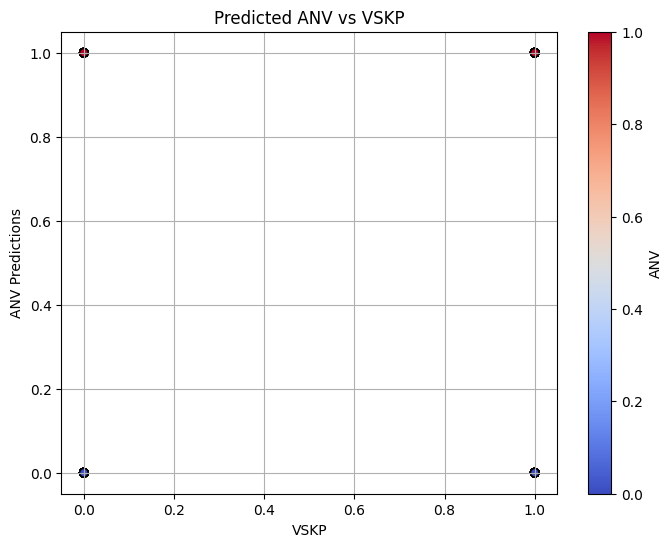

Accuracy: 0.73, Precision: 0.73, Recall: 0.61, F1-Score: 0.66


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_train = df[['VSKP', 'Temperature_1', 'Wind_Speed_1', 'Temperature_7', 'Wind_Speed_7']].values
y_train = df['ANV'].values

X_test = df[['VSKP', 'Temperature_1', 'Wind_Speed_1', 'Temperature_7', 'Wind_Speed_7']].values

n_neighbors = min(len(X_train), 5)  
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Plotting predictions
plt.figure(figsize=(8, 6))
plt.scatter(df['VSKP'], y_pred, c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Predicted ANV vs VSKP')
plt.xlabel('VSKP')
plt.ylabel('ANV Predictions')
plt.colorbar(label='ANV')
plt.grid(True)
plt.show()

# Evaluate the model
accuracy = accuracy_score(df['ANV'], y_pred)
precision = precision_score(df['ANV'], y_pred)
recall = recall_score(df['ANV'], y_pred)
f1 = f1_score(df['ANV'], y_pred)

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Prepare data
X = df[['VSKP', 'Temperature_1', 'Wind_Speed_1', 'Temperature_7', 'Wind_Speed_7']].values
y = df['ANV'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1, 11)  # Search for k from 1 to 10
}

# Initialize kNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print("Test Set Accuracy with Best Model:", test_accuracy)


Best Parameters: {'n_neighbors': 7}
Best Cross-validation Accuracy: 0.6094097019286966
Test Set Accuracy with Best Model: 0.547945205479452
